In [20]:
import os, sys
import re
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt


In [21]:
sys.path.append("../Util")
from create_test_yaml import create_yaml

msg = vl.Logger()

In [22]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        /home/vallereichi/mssmscanning/data/gambit-output/FS_rd_MSSM7atQ_v1/samples/MSSM7atQ.hdf5


In [23]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
input_parameters = []
pattern = re.compile(r'#MSSM.*atQ_parameters @MSSM.*atQ::primary_parameters::(?!.*_isvalid).*$')
for key in hdf5.keys():
    print(key)
    match = pattern.search(key)
    if match:
        input_parameters.append(match.group())

labels = [string.split('::')[-1] for string in input_parameters]
parameter_df = hdf5_df[input_parameters]
parameter_df.columns = labels
parameter_df = parameter_df.loc[:, parameter_df.nunique() > 2]


mask = hdf5_df["LogLike_isvalid"] == 1
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)
valid_models


#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2_isvalid
#MSSM7atQ_parameters

,Ad_3,Au_3,M2,TanBeta,mHd2,mHu2,mf2
47,-20.363407,91.712936,318.690332,5.237649,3.324689e+04,-6.823612e+05,3.725724e+06
116,-1354.073962,91.678744,535.714974,3.111271,7.892321e+04,-2.660122e+06,2.229473e+06
214,5671.201884,-87.046112,1646.426912,24.632718,2.672728e+05,-2.220804e+05,5.952709e+06
223,83.804770,-147.681696,-953.817241,4.248929,1.657476e+06,-5.268917e+04,2.294068e+06
335,2735.108937,-291.548824,989.427365,27.205689,2.983063e+06,-1.059819e+05,7.011641e+05
352,-203.644993,-141.100741,-176.247134,26.370575,7.385240e+03,-9.953519e+05,9.379166e+06
388,8804.435584,3683.177013,-110.191496,3.129409,3.340296e+05,-1.822955e+06,7.523429e+06
508,-3855.497603,939.332774,1505.005395,12.258485,4.871567e+04,-5.062511e+05,3.828304e+06
528,-76.692347,-885.214450,-228.594891,17.627337,9.588240e+04,-1.173848e+05,2.865148e+06
562,150.999894,-7090.181847,364.554179,8.337029,1.872169e+05,-2.428027e+06,9.204748e+06


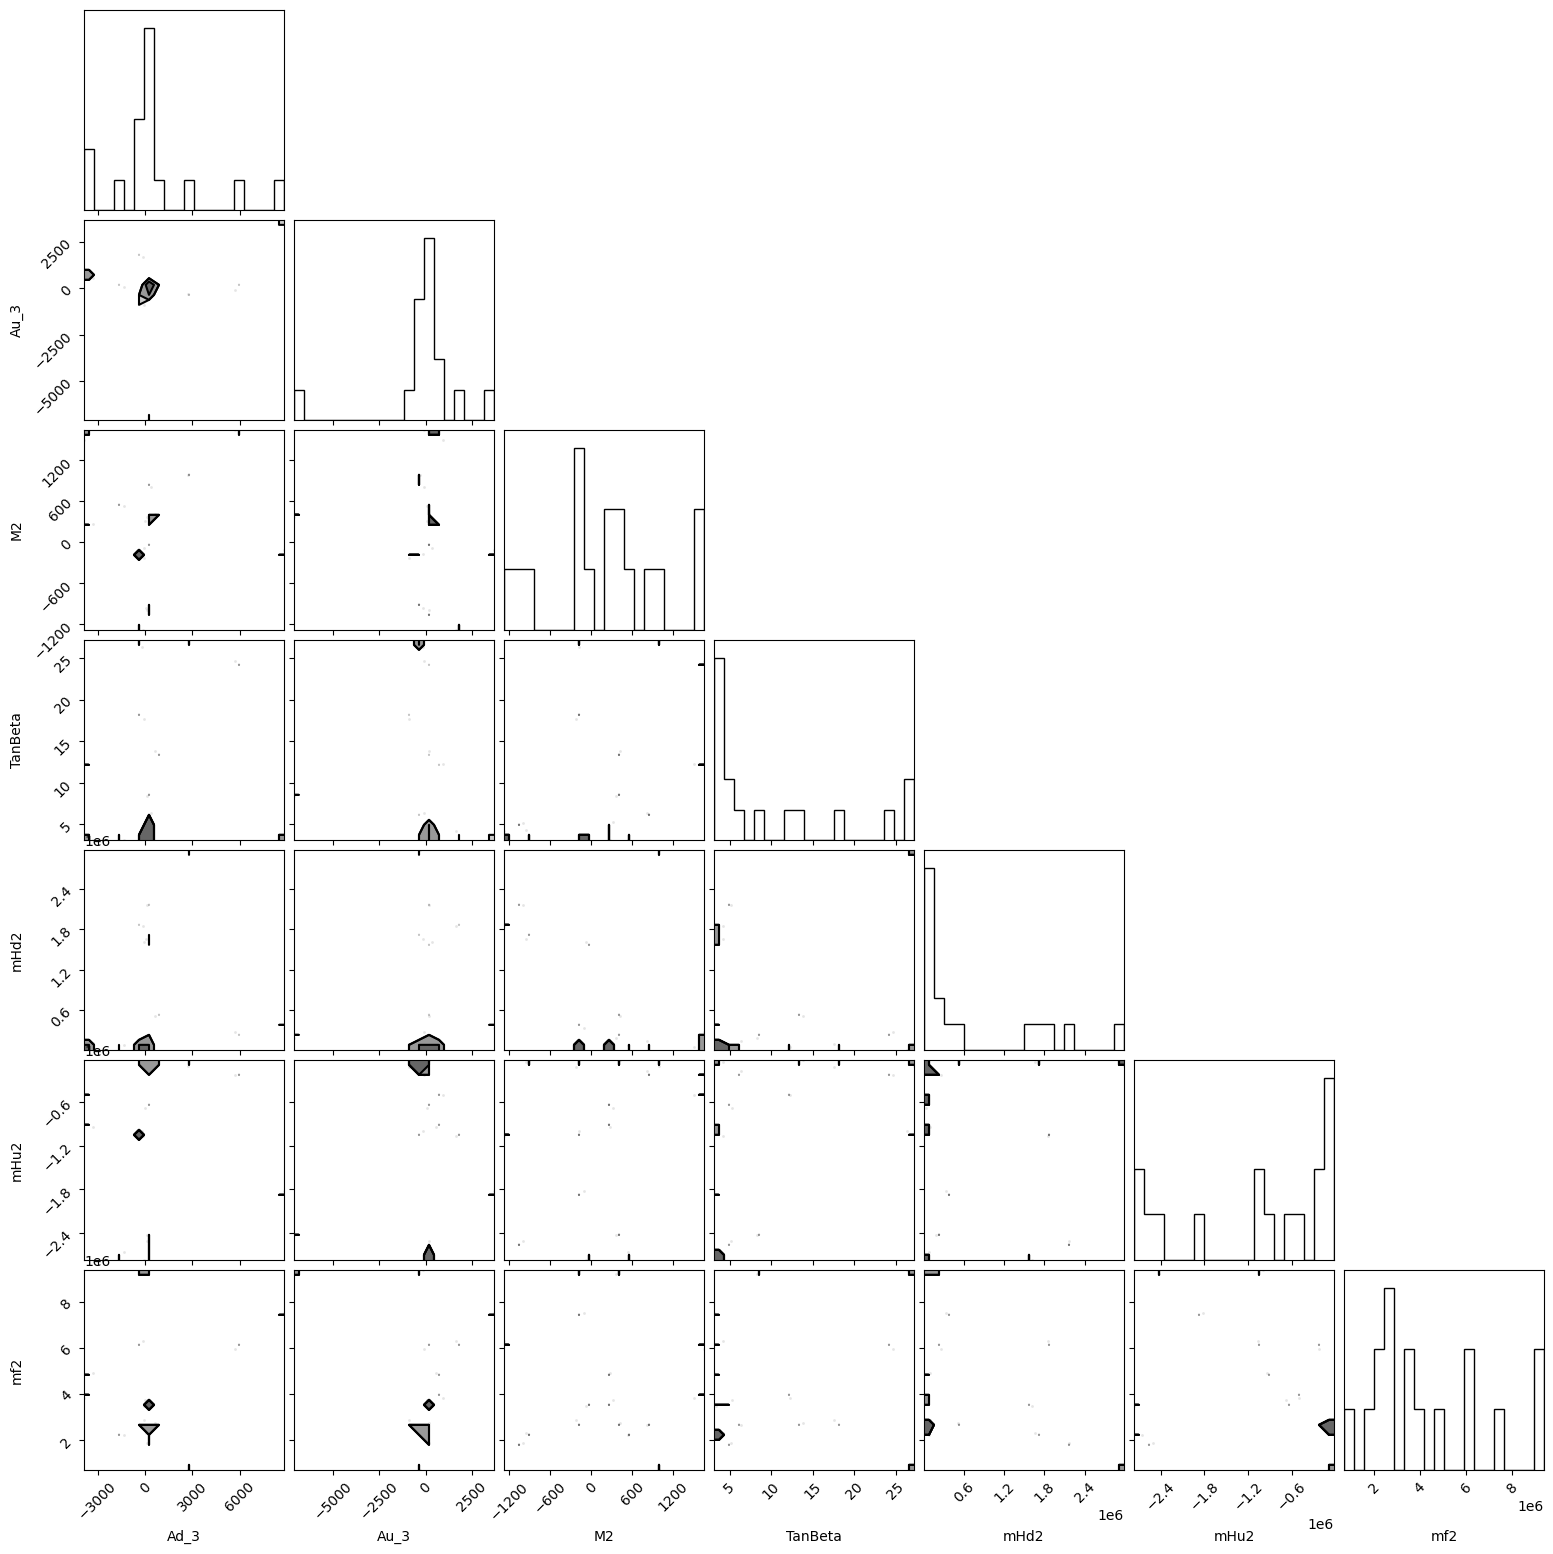

In [24]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns, fill_contours=True, plot_density=True)
#corner_fig.savefig(f"plots/gambit-{input_file.split('/')[-1]}-corner.png")

In [25]:
atlas_run2_ranges = {
    "Qin": 2000,
    "SignMu": 1,
    "TanBeta": [1,60],
    "mHu2": [-5000, 5000],
    "mHd2": [-5000, 5000],
    "M1": [-2000, 2000],
    "M2": [-2000, 2000],
    "M3": [1000, 5000],
    "mq2_12": 10000,
    "mq2_3": [2000, 5000],
    "ml2_12": 10000,
    "ml2_3": 10000,
    "md2_12": 10000,
    "md2_3": [2000, 5000],
    "mu2_12": 10000,
    "mu2_3": [2000, 5000],
    "Ae_3": [-2000, 2000],
    "Ad_3": [-2000, 2000],
    "Au_3": [-8000, 8000]
    }

In [26]:
minima = valid_models.min()
maxima = valid_models.max()
atlas_compatible_models = pd.DataFrame()
for parameter, range in atlas_run2_ranges.items():
    if parameter in valid_models.columns:
        atlas_compatible_models[parameter]  = valid_models[parameter].between(range[0], range[1])
boundary_table = pd.DataFrame({
    "Min": minima,
    "Max": maxima,
    #"inside ALTAS bounds": ,
})
boundary_table["inside ALTAS bounds"] = [atlas_compatible_models[parameter].sum() if parameter in atlas_compatible_models.columns else "NaN" for parameter in boundary_table.index]
boundary_table

,Min,Max,inside ALTAS bounds
Ad_3,-3.855498e+03,8.804436e+03,11
Au_3,-7.090182e+03,3.683177e+03,16
M2,-1.280251e+03,1.646427e+03,16
TanBeta,3.111271e+00,2.720569e+01,16
mHd2,7.385240e+03,2.983063e+06,0
mHu2,-2.768123e+06,-1.977613e+04,0
mf2,7.011641e+05,9.379166e+06,NaN


In [27]:
create_yaml(base_yaml="../Util/raw/FS_MSSM7atQ.yaml", section="Parameters", keys="MSSM7atQ", values=valid_models.to_dict(orient="list"), clear=True)

[Debug]                 Using base yaml file: ../Util/raw/FS_MSSM7atQ.yaml
[Debug]                 Modifying section 'Parameters' in base yaml file
[Debug]                 Clearing section 'Parameters'
[Debug]                 Appending key/value pair 'MSSM7atQ: {'Ad_3':
                        [-20.363407056279897, -1354.0739621414123, 5671.201883509257, 83.80477017435683, 2735.1089369339616, -203.64499262099787, 8804.435583951628, -3855.497602960065, -76.6923471497388, 150.99989376129, 368.254432555555, -3299.6678304498078, -36.135812855226035, 649.4187989800733, -145.921683532047, 102.81964070272547], 'Au_3': [91.71293602645488, 91.67874438310537, -87.04611221836237, -147.68169588372865, -291.5488242044239, -141.10074127930275, 3683.1770134038193, 939.3327739151608, -885.2144496844235, -7090.181846811542, -107.51668682480827, 569.3712517615608, 358.5292765148734, 164.06688617654459, 1661.5269393445096, 174.54846570742822], 'M2': [318.69033157529947, 535.714973640271, 1646.42691151974